In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Notebooks/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
df.isna().sum()

,0
category,0
text,0


In [4]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [7]:
import re
import spacy

nlp = spacy.load('en_core_web_sm')

def clean_text(text):
  text = text.lower()

  # remove non alphanumeric
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  # remove extra whitespaces
  text = re.sub(r'\s+', ' ', text).strip()

  # remove single charcter
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

  doc = nlp(text)

  tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

  text = ' '.join(tokens)

  return text

In [8]:
clean_text(df['text'][0])

'tv future hand viewer home theatre system plasma highdefinition tvs digital video recorder move living room way people watch tv radically different year time accord expert panel gather annual consumer electronic las vegas discuss new technology impact favourite pastime lead trend programme content deliver viewer home network cable satellite telecom company broadband service provider room portable device talkedabout technology ce digital personal video recorder dvr pvr settop box like tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allow personalised tv builtin highdefinition tv set big business japan slow europe lack highdefinition programming people forward wind advert forget abide network channel schedule put alacarte entertainment network cable satellite company worried mean term advertising revenue brand identity viewer loyalty channel lead technology moment concern raise europe particularly grow uptake service like sky

In [10]:
df.shape

(2225, 2)

In [11]:
df['category'].value_counts()

,count
category,
sport,511
business,510
politics,417
tech,401
entertainment,386


In [12]:
df['cleaned_text'] = df['text'].apply(clean_text)
df.head()

,category,text,cleaned_text
0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,business,worldcom boss left books alone former worldc...,worldcom boss leave book worldcom boss bernie ...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,yeade face newcastle fa cup premiership newcas...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean raid box office ocean crime caper sequel...


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df.head()

,category,text,cleaned_text
0,4,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,0,worldcom boss left books alone former worldc...,worldcom boss leave book worldcom boss bernie ...
2,3,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester rush make ...
3,3,yeading face newcastle in fa cup premiership s...,yeade face newcastle fa cup premiership newcas...
4,1,ocean s twelve raids box office ocean s twelve...,ocean raid box office ocean crime caper sequel...


In [14]:
X = df['cleaned_text']
y = df['category']

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score

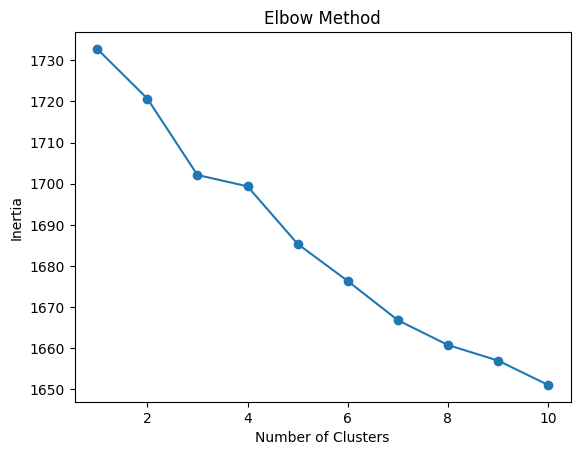

In [31]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
silhouette_score(X_test, y_pred)

0.007347229384937282

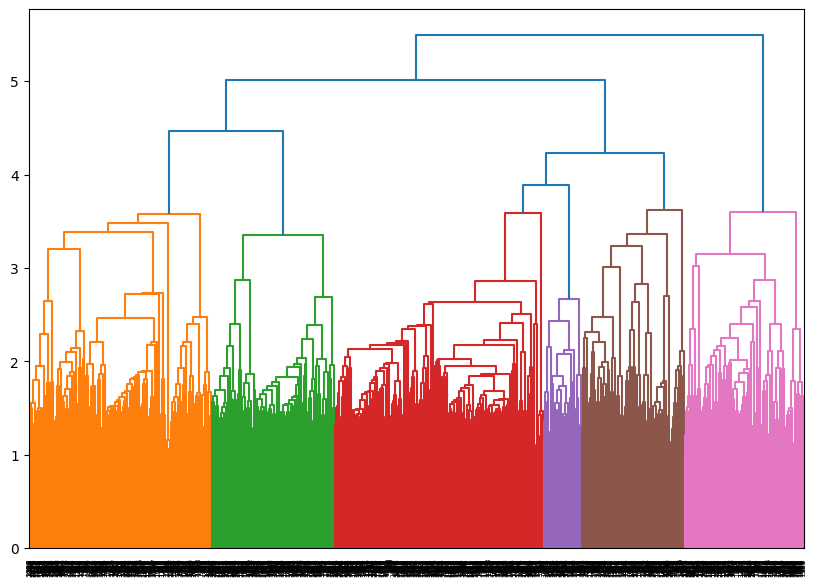

In [36]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_train.toarray(), 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [37]:
Agg = AgglomerativeClustering(n_clusters=5)
Agg.fit(X_train.toarray())
y_pred = Agg.fit_predict(X_test.toarray())
silhouette_score(X_test.toarray(), y_pred)

0.010071994279880921